# Shape of decision-consistent biases

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from statsmodels.stats.weightstats import DescrStatsW

from dynamic_bias import utils
from dynamic_bias.analyses.behavior import NearReferenceStatistics
utils.setup_matplotlib()

In [2]:
utils.download_dataset("data/outputs/behavior")
utils.download_dataset("data/outputs/ddm")
behavior = utils.load_behavior()
ssdcb = utils.load(f'{utils.ORIGIN}/data/outputs/ddm/results_stimulus_specific_decision_conditioned.pickle')
nrvs = utils.load(f'{utils.ORIGIN}/data/outputs/ddm/results_near_reference_variability.pickle')

downloading data/outputs/behavior...
data/outputs/behavior already exists. Skipping download...
downloading data/outputs/ddm...
data/outputs/ddm already exists. Skipping download...
downloading data/processed/behavior...
data/processed/behavior already exists. Skipping download...


---
## Behavior bias shape

In [3]:
idx_near = np.abs(behavior.ref) < 8
beh_near = {k: v[idx_near] for k, v in behavior.items()}

merrors = utils.collapse(beh_near['error'],
                         collapse_groups=[beh_near['Timing'], beh_near['stim'], beh_near['choice']],
                         collapse_func=utils.circmean, return_list=True)
merrors = np.array(merrors)
serrors = utils.collapse(beh_near['error'],
                         collapse_groups=[beh_near['Timing'], beh_near['stim'], beh_near['choice']],
                         collapse_func=utils.se, return_list=True)
serrors = np.array(serrors)

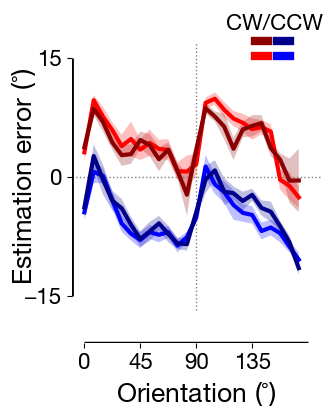

In [4]:
f,ax = plt.subplots(1,1)
utils.set_size([2.8,3.5])

plt.axvline(x=90, ymin=0.1, ymax=0.9, linestyle='dotted', color='gray', linewidth=1.)
plt.axhline(y=0,  linestyle='dotted', color='gray', linewidth=1.)

plt.plot(utils.exp_stim_list(), merrors[1,:,1], color='blue',linewidth=3)
plt.plot(utils.exp_stim_list(), merrors[1,:,0], color='red', linewidth=3)
plt.plot(utils.exp_stim_list(), merrors[0,:,1], color='darkblue',linewidth=3)
plt.plot(utils.exp_stim_list(), merrors[0,:,0], color='darkred',linewidth=3)

plt.fill_between(x=utils.exp_stim_list(), y1=(merrors-serrors)[0,:,1], y2=(merrors+serrors)[0,:,1], color='darkblue', alpha=0.25, edgecolor="none")
plt.fill_between(x=utils.exp_stim_list(), y1=(merrors-serrors)[0,:,0], y2=(merrors+serrors)[0,:,0], color='darkred', alpha=0.25, edgecolor="none")
plt.fill_between(x=utils.exp_stim_list(), y1=(merrors-serrors)[1,:,1], y2=(merrors+serrors)[1,:,1], color='blue', alpha=0.25, edgecolor="none")
plt.fill_between(x=utils.exp_stim_list(), y1=(merrors-serrors)[1,:,0], y2=(merrors+serrors)[1,:,0], color='red', alpha=0.25, edgecolor="none")

plt.xlim([-10,190])
plt.ylim([-21,21])

# legend
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerTuple
markerpar  = {'markeredgewidth': 2, 'markersize': 9, 'linestyle': '-', 'linewidth': 6}
line_red   = mlines.Line2D([], [], color='red', **markerpar)
line_blue  = mlines.Line2D([], [], color='blue', **markerpar)
line_dred  = mlines.Line2D([], [], color='darkred', **markerpar)
line_dblue = mlines.Line2D([], [], color='darkblue', **markerpar)

plt.legend([(line_dred,line_dblue), (line_red,line_blue)], ['', ''] ,
           handler_map={tuple: HandlerTuple(ndivide=None)},
           frameon=False, loc=(0.7, 0.8), fontsize=16, 
           handletextpad=0.8, handlelength=1.6, labelspacing=-0.22)
plt.text(0.79, 0.89, 'CW/CCW', ha='center', va='center', transform=f.transFigure, fontsize=16)

if utils.LABEL:
    plt.xlabel(r"Orientation $(\!\!^\circ\!\!)$")
    plt.ylabel(r"Estimation error $(\!\!^\circ\!\!)$", labelpad=-10)

utils.draw_publish_axis(ax, xrange=(0,180), yrange=(-15,15), xticks=[0,45,90,135], yticks=[-15,0,15])
plt.savefig(f'{utils.DIR_FIGURE}/figs4a.pdf',bbox_inches='tight', transparent=True)
plt.show()

---
## Drift-diffusion models bias shape

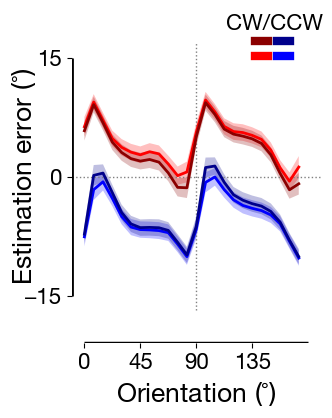

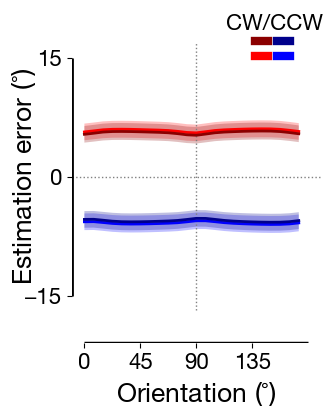

In [5]:
for imodel, nmodel in enumerate(['full', 'reduced']):
    f,ax = plt.subplots(1,1)
    utils.set_size([2.8,3.5])

    plt.axvline(x=90, ymin=0.1, ymax=0.9, linestyle='dotted', color='gray', linewidth=1.)
    plt.axhline(y=0,  linestyle='dotted', color='gray', linewidth=1.)
    
    s = utils.exp_stim_list()

    plt.plot(s, ssdcb['m'][nmodel]['late'] ['cw'],  color='red', linewidth=2)
    plt.plot(s, ssdcb['m'][nmodel]['late'] ['ccw'], color='blue',linewidth=2)
    plt.plot(s, ssdcb['m'][nmodel]['early']['cw'],  color='darkred', linewidth=2)
    plt.plot(s, ssdcb['m'][nmodel]['early']['ccw'], color='darkblue',linewidth=2)

    ms = np.array( utils.recursive_list(ssdcb['m'][nmodel]) )
    ss = np.array( utils.recursive_list(ssdcb['s'][nmodel]) )

    plt.fill_between(s, y1=(ms-ss)[1,0], 
                        y2=(ms+ss)[1,0], color='red', alpha=0.25, edgecolor="none")
    plt.fill_between(s, y1=(ms-ss)[1,1], 
                        y2=(ms+ss)[1,1], color='blue', alpha=0.25, edgecolor="none")
    plt.fill_between(s, y1=(ms-ss)[0,0], 
                        y2=(ms+ss)[0,0], color='darkred', alpha=0.25, edgecolor="none")
    plt.fill_between(s, y1=(ms-ss)[0,1], 
                        y2=(ms+ss)[0,1], color='darkblue', alpha=0.25, edgecolor="none")

    plt.xlim([-10,190])
    plt.ylim([-21,21])

    # legend
    import matplotlib.lines as mlines
    from matplotlib.legend_handler import HandlerTuple
    markerpar  = {'markeredgewidth': 2, 'markersize': 9, 'linestyle': '-', 'linewidth': 6}
    line_red   = mlines.Line2D([], [], color='red', **markerpar)
    line_blue  = mlines.Line2D([], [], color='blue', **markerpar)
    line_dred  = mlines.Line2D([], [], color='darkred', **markerpar)
    line_dblue = mlines.Line2D([], [], color='darkblue', **markerpar)

    plt.legend([(line_dred,line_dblue), (line_red,line_blue)], ['', ''] ,
            handler_map={tuple: HandlerTuple(ndivide=None)},
            frameon=False, loc=(0.7, 0.8), fontsize=16, 
            handletextpad=0.8, handlelength=1.6, labelspacing=-0.22)
    plt.text(0.79, 0.89, 'CW/CCW', ha='center', va='center', transform=f.transFigure, fontsize=16)

    if utils.LABEL:
        plt.xlabel(r"Orientation $(\!\!^\circ\!\!)$")
        plt.ylabel(r"Estimation error $(\!\!^\circ\!\!)$", labelpad=-10)

    utils.draw_publish_axis(ax, xrange=(0,180), yrange=(-15,15), xticks=[0,45,90,135], yticks=[-15,0,15])

    fn = ['b','c'][imodel]
    plt.savefig(f'{utils.DIR_FIGURE}/figs4{fn}.pdf',bbox_inches='tight', transparent=True)
    plt.show()

---
## Near-reference variability

In [6]:
evi_list = utils.exp_ref_list()

nrv_full_list = np.array([nrvs['refwise']['full'][-v] for v in evi_list])
nrv_full_no_wa_list = np.array([nrvs['refwise']['full_no_wa'][-v] for v in evi_list])

nrv_full_m,  nrv_full_s  = utils.meanstats(nrv_full_list)
nrv_full_nm, nrv_full_ns = utils.meanstats(nrv_full_no_wa_list)

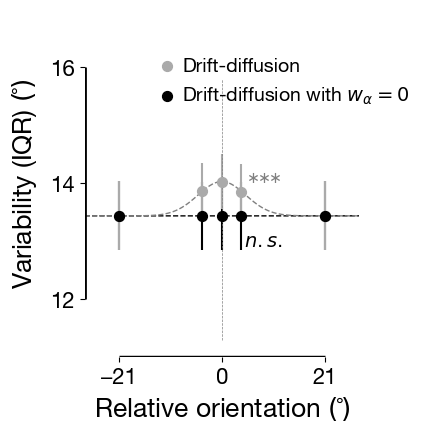

In [7]:
plt.figure()
ax = plt.gca()
utils.set_size([3.2,3.5])

plt.scatter(evi_list, nrv_full_m, color='#AAAAAA', s=50, zorder=3, label='Drift-diffusion')
plt.scatter(evi_list, nrv_full_nm, color='k', s=50, zorder=3, label='Drift-diffusion with ' +r'$w_{\alpha}=0$')
plt.vlines(evi_list, nrv_full_nm-nrv_full_ns, nrv_full_nm+nrv_full_ns, color='k', alpha=1)
plt.vlines(evi_list, nrv_full_m - nrv_full_s, nrv_full_m + nrv_full_s, color='#AAAAAA', alpha=1)

nrs = NearReferenceStatistics()
nrs.fit_gaussian(evi_list, nrv_full_list.T, init_params=[0,2,1])
xxx = np.linspace(-28,28,100)
yyy = nrs.centered_gaussian(xxx)
plt.plot(xxx, yyy, color='gray', linestyle='dashed', linewidth=1, zorder=-2)

nrs.fit_gaussian(evi_list, nrv_full_no_wa_list.T, init_params=[0,2,1])
xxx = np.linspace(-28,28,100)
yyy = nrs.centered_gaussian(xxx)
plt.plot(xxx, yyy, color='k', linestyle='dashed', linewidth=1, zorder=-3)

plt.axvline(x=0, ymin=0.05, ymax=0.8, color='gray', linestyle='dashed', linewidth=0.5)
plt.ylim([11,17])
plt.xlim([-28,28])
plt.legend(frameon=False, handletextpad=-0.2, loc=(0.2,0.7))

ax.text(8.5, 14, r'$^{\ast\!\!\ast\!\!\!\ast}$', fontsize=16, color='gray', ha='center', va='center')
ax.text(8.5, 13, r'$n.s.$', fontsize=14, color='k', ha='center', va='center')

if utils.LABEL:
    ax.set_xlabel(f"Relative orientation $(\!\!^\circ\!\!)$", labelpad=5)
    ax.set_ylabel(f"Variability (IQR) $(\!\!^\circ\!\!)$", labelpad=8)

utils.draw_publish_axis(ax, xrange=(-21,21), yrange=(12,16), xticks=[-21,0,21], yticks=[12,14,16])
plt.savefig(f'{utils.DIR_FIGURE}/figs4d.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [9]:
for v_model, desc_model in zip(['full', 'full_no_wa'], ['(Drift-diffusion)', '(Drift-diffusion with w_a=0)']):
    v1 = np.array(nrvs['combined'][v_model]['near'])
    v2 = np.array(nrvs['combined'][v_model]['far'])
    ttest  = DescrStatsW(v1/v2 - 1)
    wilcox = wilcoxon(v1/v2 - 1)

    print(f"\n\nNear-reference variability: Near vs. Far {desc_model}")
    print('\nPaired samples t-test')
    print('t(49)=',  ttest.ttest_mean()[0], 'p=', ttest.ttest_mean()[1])
    print('95% CI=', ttest.tconfint_mean())
    print('\nWilcoxon signed-rank test (without continuity correction)')
    print('V=', wilcox[0], 'p=', wilcox[1])



Near-reference variability: Near vs. Far (Drift-diffusion)

Paired samples t-test
t(49)= 4.195089078347338 p= 0.00011410439993250903
95% CI= (0.03112149958355134, 0.08835380218280296)

Wilcoxon signed-rank test (without continuity correction)
V= 253.0 p= 0.00011903464815610221


Near-reference variability: Near vs. Far (Drift-diffusion with w_a=0)

Paired samples t-test
t(49)= -1.3567423190152188 p= 0.18108102863313233
95% CI= (-6.755421484003953e-05, 1.3100848130227141e-05)

Wilcoxon signed-rank test (without continuity correction)
V= 367.0 p= 0.7481214114972881
